<hr></hr>

# <center> <ins> Futuristic Airbnb – Exploring in London</ins> </center>

<hr> </hr>


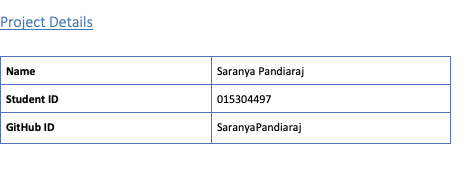

<hr> </hr>


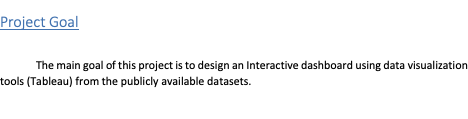

<hr> </hr>

<b> 
<p style='text-align: justify;'>
    
        Airbnb is a vacation rental platform where the user can rent a home for tourism experiences. User can also list their properties in Airbnb for renting it out. Airbnb can see an exponential increase in the number of rentals listed on their platform every year. The platform has attracted more people with their home friendly services and hospitality. Thus, feels like staying in a home even on a vacation.
    
    
        London is the most popular place having around 87000 listings as of December 16, 2020. Around 40% of their listings with the entire home types are being rented out to the tourists for more than 90 days term. On an average term, Airbnb guests stay for around an average of 4.5 nights in London. 
    
    
        The main purpose of this project is to analyze and visualize the Airbnb dataset. Our investigation will help us to determine the factors for the success of Airbnb business; places to explore for the hosts to expand the Airbnb business; covid impacts on Airbnb; listings managed by the hosts; Renting prices based on the accommodates;  judging the host response rate; Visitor trends based on the reviews; forecasting/predicting the listing price over the time; availability frequency; etc. To visually analyze the data, we will be creating an interactive dashboard & stories using Tableau. This dashboard will be helpful for the user to find a better accommodation based on customer satisfaction & requirements. And, will also help in improving the Airbnb business based on certain factors in London.

 </p>
</b>




<hr></hr>

<hr> </hr>

### <ins> Importing Dependencies </ins>

<hr> </hr>

In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
import json
import gmaps
from datetime import datetime
import seaborn as sns
import re
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Files and storing in Dataframes

#Listings File

Listings_df = pd.read_csv("Dataset/listings.csv")


In [3]:
#Reviews File

Reviews_df = pd.read_csv("Dataset/reviews.csv")

In [4]:
#Neighbourhoods File

Neighbourhoods_df = pd.read_csv("Dataset/neighbourhoods.csv")


In [5]:
#Neighbourhoods Json File 

Neighbourhoods_json_df = pd.read_json('Dataset/neighbourhoods.geojson')


In [6]:
#Calendar file

Calendar_Summary_df = pd.read_csv("Dataset/calendar.csv", parse_dates=['date'], index_col='listing_id')

<hr></hr>

### <ins> Identifying the Columns </ins>

<hr></hr>

In [7]:
Listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [8]:
Listings_df.shape

(76534, 74)

In [9]:
Reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [10]:
Reviews_df.shape

(1163886, 6)

In [11]:
Neighbourhoods_df.columns

Index(['neighbourhood'], dtype='object')

In [12]:
Neighbourhoods_df.shape

(33, 1)

In [13]:
Neighbourhoods_json_df.columns

Index(['type', 'features'], dtype='object')

In [14]:
Neighbourhoods_json_df.shape

(33, 2)

In [15]:
Calendar_Summary_df.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [16]:
Calendar_Summary_df.shape

(1048575, 6)

In [17]:
pd.set_option('display.max_columns', len(Listings_df.columns)) 
pd.set_option('display.max_rows', 107)

<hr></hr>

### <ins> Sample Dataset </ins>

<hr></hr>

In [18]:
Listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,2.021020e+13,2/12/21,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,11/16/09,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,67%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",...",40.0,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,30,60,90,365,2/12/21,21,1,0,8/18/10,2/22/20,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,2.021020e+13,2/12/21,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,12/5/09,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Shampoo"", ""Long term stays a...",75.0,10,50,10.0,10.0,50.0,50.0,10.0,50.0,NaN,t,16,16,16,189,2/12/21,89,1,0,12/21/09,3/16/20,96.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,0.66
2,17402,https://www.airbnb.com/rooms/17402,2.021020e+13,2/12/21,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,Liz,1/4/10,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,a few days or more,0%,100%,t,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,18.0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,NaN,51.52195,-0.14094,Entire apartment,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",...",307.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,NaN,t,0,0,16,270

In [19]:
Reviews_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [20]:
Neighbourhoods_df.head(5)

,neighbourhood
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley


In [21]:
Neighbourhoods_json_df.head(5)

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [22]:
Calendar_Summary_df.head(5)

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
100326,2021-02-13,f,33.0,33.0,2.0,10.0
13913,2021-02-12,t,40.0,40.0,1.0,29.0
13913,2021-02-13,t,40.0,40.0,1.0,29.0
13913,2021-02-14,t,40.0,40.0,1.0,29.0
13913,2021-02-15,t,40.0,40.0,1.0,29.0


### <ins> Keeping the Necessary Columns </ins>

In [23]:
#Determining the Null Value Data
round(( Listings_df.isna().sum()/len(Listings_df) ) * 100).sort_values(ascending=False)

neighbourhood_group_cleansed                    100.0
license                                         100.0
bathrooms                                       100.0
calendar_updated                                100.0
host_response_rate                               56.0
host_response_time                               56.0
host_acceptance_rate                             45.0
host_about                                       45.0
neighbourhood                                    39.0
neighborhood_overview                            39.0
review_scores_rating                             31.0
review_scores_accuracy                           31.0
review_scores_cleanliness                        31.0
review_scores_checkin                            31.0
review_scores_communication                      31.0
review_scores_location                           31.0
review_scores_value                              31.0
last_review                                      29.0
first_review                

In [24]:
#Determining the Null Value Data
round(( Reviews_df.isna().sum()/len(Reviews_df) ) * 100).sort_values(ascending=False)

listing_id       0.0
id               0.0
date             0.0
reviewer_id      0.0
reviewer_name    0.0
comments         0.0
dtype: float64

In [25]:
#Determining the Null Value Data
round(( Neighbourhoods_df.isna().sum()/len(Neighbourhoods_df) ) * 100).sort_values(ascending=False)

neighbourhood    0.0
dtype: float64

In [26]:
#Determining the Null Value Data
round(( Neighbourhoods_json_df.isna().sum()/len(Neighbourhoods_json_df) ) * 100).sort_values(ascending=False)

type        0.0
features    0.0
dtype: float64

In [27]:
#Determining the Null Value Data
round(( Calendar_Summary_df.isna().sum()/len(Calendar_Summary_df) ) * 100).sort_values(ascending=False)

date              0.0
available         0.0
price             0.0
adjusted_price    0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64

### <ins> Data Cleaning </ins>

In [28]:
#The below Columns has more than 80% of NA values, hence dropping it.

Listings_df.drop(['license','neighbourhood_group_cleansed', 'calendar_updated'], axis=1, inplace=True)

In [29]:
Listings_df['bathrooms_text'].value_counts()

1 bath               32188
1 shared bath        14038
2 baths               8910
1 private bath        6112
1.5 baths             5054
1.5 shared baths      3687
2.5 baths             1859
2 shared baths        1344
3 baths               1102
3.5 baths              434
2.5 shared baths       347
4 baths                230
0 shared baths         173
3 shared baths         161
0 baths                136
Shared half-bath       109
Half-bath              107
4.5 baths               95
5 baths                 48
3.5 shared baths        37
Private half-bath       31
5.5 baths               21
6 baths                 21
4 shared baths          20
10 baths                19
6 shared baths          19
4.5 shared baths         8
6.5 baths                8
5 shared baths           7
8 baths                  5
7 baths                  5
7 shared baths           3
8 shared baths           3
8.5 baths                2
7.5 baths                2
17 baths                 1
12 baths                 1
3

In [30]:
# Replacing few column value texts in bathrooms_text column with the releavant values 
# such that it will easy to calculate the no. of bathrooms

Listings_df.bathrooms_text.replace({
    'Shared half-bath' : '0.5 shared bath',
    'Half-bath': '0.5 bath',
    'Private half-bath': '0.5 Private bath'
    }, inplace=True)

In [31]:
# Bathrooms has full of Null Values ; Hence Replacing the Null values in the bathroom column 
# by extracting the numerical values in the bathroom_txt feature
Listings_df["bathrooms"] =  Listings_df["bathrooms_text"].str.split(" ", 1, expand=True)
Listings_df["bathrooms"] =  Listings_df["bathrooms"].astype(float)
Listings_df["bathrooms"].value_counts()

1.0     52338
2.0     10254
1.5      8741
2.5      2206
3.0      1263
3.5       471
0.0       309
4.0       250
0.5       247
4.5       103
5.0        55
6.0        40
5.5        21
10.0       19
6.5         8
7.0         8
8.0         8
9.0         2
8.5         2
7.5         2
12.0        1
11.0        1
17.0        1
35.0        1
11.5        1
10.5        1
Name: bathrooms, dtype: int64

In [32]:
#Dropping the unneccessay columns in Listings_df which is not used for analysis

Listings_df = Listings_df.drop ([ 'scrape_id',  'host_url',
                                 'host_location','host_about', 'host_thumbnail_url','host_picture_url', 
                                  'host_neighbourhood','last_scraped','calendar_last_scraped', 'neighborhood_overview',
                                  'neighbourhood','host_verifications','description'
                                 ], axis =1)


In [33]:
## Similar Values in minimum n maximum nights

Listings_df[['minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights', 
             'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']].head()

,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,1.0,1.0,29.0,29.0,1.0,29.0
1,10.0,10.0,50.0,50.0,10.0,50.0
2,4.0,4.0,365.0,365.0,4.0,365.0
3,3.0,3.0,21.0,21.0,3.0,21.0
4,10.0,10.0,1125.0,1125.0,10.0,1125.0


In [34]:
##Dropping the Similar kind of Columns

##host_listings_count and host_total_listings_count are the same in all 
#These cases are those where the value is NaN. 

Listings_df.drop(['calculated_host_listings_count_shared_rooms','minimum_minimum_nights', 'maximum_minimum_nights',
'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                 'host_total_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms'],
axis=1, inplace=True)    


In [35]:
Listings_df = Listings_df.drop_duplicates(subset=['id'], keep='last')

In [36]:
boolean_col = ['has_availability', 'host_is_superhost','instant_bookable', 'host_identity_verified']
                  
for col in boolean_col:
    print(Listings_df[col].value_counts(normalize=True)) 

t    0.997687
f    0.002313
Name: has_availability, dtype: float64
f    0.859991
t    0.140009
Name: host_is_superhost, dtype: float64
f    0.639232
t    0.360768
Name: instant_bookable, dtype: float64
t    0.766748
f    0.233252
Name: host_identity_verified, dtype: float64


From the above values, its evident that <br> </br>

    > 99% of the listings has the availability in London. 

    > 76% of the hosts have the option of instant booking for the guest accomodation.Remaining 36% of the Hosts can Work on Having this option for the Ease of booking the rooms. 

    > 64% of the hosts are the superhosts. Superhosts means the top-rated and most experienced hosts, and can increase the host search ranking in Airbnb. 

    > 76% of the hosts identity are verified. 

In [37]:
Listings_df.amenities[1:5].values

array(['["Refrigerator", "Shampoo", "Long term stays allowed", "Hangers", "Hot water", "Kitchen", "Wifi", "Washer", "Essentials", "Hair dryer", "Smoke alarm", "Heating", "Dishes and silverware", "TV", "Dryer", "Iron", "Cooking basics", "Air conditioning", "Dedicated workspace", "Luggage dropoff allowed", "Coffee maker", "Cable TV", "Fire extinguisher", "Microwave"]',
       '["Oven", "Shampoo", "Refrigerator", "Hangers", "Long term stays allowed", "Hot water", "Kitchen", "Stove", "Lockbox", "Wifi", "Washer", "Essentials", "Hair dryer", "Paid parking off premises", "Smoke alarm", "Heating", "Dishes and silverware", "TV", "Dishwasher", "Dryer", "Iron", "Cooking basics", "Dedicated workspace", "Bed linens", "Coffee maker", "Microwave", "Elevator"]',
       '["Shampoo", "Dedicated workspace", "Hangers", "Essentials", "Hot water", "Iron", "Hair dryer", "Shower gel", "Breakfast", "Smoke alarm", "Lock on bedroom door", "Carbon monoxide alarm", "Heating", "Wifi", "Air conditioning", "TV"]',
  

In [38]:
#Data Cleaning the Amenities Column

Amenities = Listings_df.amenities

Amenities_List = []

for x in Amenities:
        x=x.replace('"','')
        x=x.replace('{','')
        x=x.replace('}','')
        x=x.replace('[','')
        x=x.replace(']','')
        x=x.replace('Cable TV', 'TV')
        x=x.replace('Pocket wifi', 'Wifi')
        Amenities_List += x.split(',')

Amenities_List.remove(' 2-5 years old')
Amenities_List.remove(' 1 space')
Amenities_List.remove(' 5-10 years old')
Amenities_List.remove(' 5 spaces')
Amenities_List.remove(' and 10+ years old')
Amenities_List.remove('')
Amenities_New = pd.DataFrame(Amenities_List)
Amenities_New = Amenities_New.rename(columns = {0:"Amenities"})

Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*HDTV.*$)', 'TV')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*Mbps.*$)', 'Wifi')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*sound.*$)', 'Sound system')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*conditioner.*$)', 'Conditioner')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*shampoo.*$)', 'Shampoo')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*conditioning.*$)', 'Air conditioning')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*soap.*$)', 'Body soap')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*TV.*$)', 'TV')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*oven.*$)', 'Oven')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*refrigerator.*$)', 'Refrigerator')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*stove.*$)', 'Stove')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*storage.*$)', 'Clothing storage')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*space.*$)', 'Dedicated workspace')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*closet.*$)', 'closet')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*dresser.*$)', 'dresser')
Amenities_New.Amenities = Amenities_New.Amenities.str.replace(r'(^.*Ceiling fans.*$)', 'Ceiling fan')

Amenities_New.describe()
Amenities_New = Amenities_New.dropna()
Amenities_New.to_csv("Amenities.csv")

In [39]:

#Data Cleanup for First_Review, Host_Since 

Listings_df.first_review = pd.to_datetime(Listings_df.first_review)
Listings_df.host_since = pd.to_datetime(Listings_df.host_since) 


In [41]:
#Data Cleanup for host_reponse_time 
#Listings_df.host_response_time.fillna("N/A", inplace=True)
#Listings_df.host_response_time.value_counts(normalize=True)

Listings_df['host_response_rate'] = pd.to_numeric(Listings_df.host_response_rate.str.strip('%'))
Listings_df["host_response_rate"] = Listings_df["host_response_rate"].dropna()
Listings_df["host_response_time"] = Listings_df["host_response_time"].dropna()

In [42]:
Listings_df["property_type"].value_counts()

Entire apartment                      31714
Private room in apartment             18038
Private room in house                 11092
Entire house                           5516
Private room in townhouse              1521
Entire condominium                     1376
Entire townhouse                        963
Entire serviced apartment               936
Private room in condominium             669
Private room in bed and breakfast       567
Room in boutique hotel                  489
Entire loft                             432
Room in hotel                           321
Shared room in apartment                299
Room in serviced apartment              279
Private room in loft                    238
Private room in guest suite             183
Entire guest suite                      174
Private room in guesthouse              173
Shared room in house                    130
Room in aparthotel                      125
Entire guesthouse                       118
Private room                    

In [43]:
#Data Cleanup for Property type
Listings_df["property_type"] = Listings_df["property_type"].apply(lambda x: x.replace("Private room in ", ""))
Listings_df["property_type"] = Listings_df["property_type"].apply(lambda x: x.replace("Shared room in ", ""))
Listings_df["property_type"] = Listings_df["property_type"].apply(lambda x: x.replace("Entire ", ""))
Listings_df["property_type"] = Listings_df["property_type"].apply(lambda x: x.replace("Room in ", ""))
Listings_df['property_type'] = Listings_df['property_type'].str.capitalize()
Listings_df.property_type.value_counts(normalize=True)


Apartment             0.654010
House                 0.218700
Townhouse             0.032600
Condominium           0.026877
Serviced apartment    0.016894
Loft                  0.008820
Bed and breakfast     0.008428
Boutique hotel        0.006415
Guest suite           0.004704
Hotel                 0.004207
Guesthouse            0.003854
Hostel                0.003358
Bungalow              0.001855
Aparthotel            0.001633
Private room          0.001372
Cottage               0.001084
Tiny house            0.000915
Boat                  0.000888
Villa                 0.000601
Houseboat             0.000353
Home/apt              0.000327
Place                 0.000314
Earth house           0.000235
Cabin                 0.000235
Camper/rv             0.000196
Chalet                0.000157
Hut                   0.000131
Floor                 0.000118
Yurt                  0.000091
Casa particular       0.000078
Farm stay             0.000078
Barn                  0.000065
Shared r

In [44]:
#Data Cleanup for Property type
Listings_df.property_type.replace({
    'Condominium' : 'Apartment',
    'Loft' : 'Apartment',
    'Serviced apartment': 'Apartment',
    'Townhouse': 'House',
    'Bed and breakfast' : 'Hotel',
    'Guesthouse' : 'Guest suite',
    'Boutique hotel': 'Hotel',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Boat': 'House',
    'Camper/RV': 'Other',
    'Earth house': 'House',
    'Houseboat': 'House' ,
    'Pension (South Korea)' : 'Other',
    'Tiny house' : 'House',
    'Aparthotel' : 'Hotel',
    'Cabin' : 'Other',
    'Casa particular (Cuba)' : 'Other',
    'Castle' : 'Other',
    'Barn' : 'Other',
    'Chalet' : 'Other',
    'Island' : 'Other',
    'Tipi' : 'Other',
    'In-law' : 'Other',
    'Cave' : 'Other',
    'Train' : 'Other',
    'Treehouse' : 'House',
    'Tent' :'Other',
    'Villa' : 'House',
    'Resort' : 'Other',
    'Hostel' : 'House',
    'Guest suite' : 'Hotel',
    'Home/apt' : 'Apartment',
    'Private room' : 'Hotel',
    'Guest suite' : 'Hotel',
    'Shared room' : 'Hotel',
    'Dome house' : 'House',
    'Lighthouse':'House',
    'Bus' : 'Other',
    'Minsu': 'Other',
    'Shepherd\'s hut': 'Other',
    'Parking space': 'Other',
    'Place': 'Other',
    'Hut': 'Other',
    'Floor': 'Other',
    'Yurt': 'Other',
    'Casa particular': 'Other',
    'Farm stay': 'Other',
    'Campsite': 'Other',
    'Camper/rv': 'Other',
    
    }, inplace=True)

Listings_df.property_type.value_counts(normalize=True)


Apartment      0.706928
House          0.260721
Hotel          0.026825
Guest suite    0.003854
Other          0.001672
Name: property_type, dtype: float64

In [45]:
# Calculating Ratings

Listings_df["Rating"] = round( (Listings_df['review_scores_accuracy'] + Listings_df['review_scores_cleanliness'] + 
                                 Listings_df['review_scores_checkin'] + Listings_df['review_scores_communication'] +
                                Listings_df['review_scores_location'] + Listings_df['review_scores_value']) /6 ) 
                    
Listings_df["Rating"] = Listings_df["Rating"].dropna(how="any")
Listings_df["Rating"] = (Listings_df["Rating"]) * 5/10
Listings_df["Rating"].value_counts() 

5.0    37381
4.5    11546
4.0     2268
3.5      543
3.0      296
1.0      157
2.5      126
2.0       77
1.5       75
Name: Rating, dtype: int64

In [47]:
Listings_df = Listings_df.set_index('id')
Listings_df.to_csv('Dataset/Listings_cleaned.csv')